## $$Modelos\hspace{0.1cm}de\hspace{0.1cm}desercion\hspace{0.1cm}universitaria$$

# Tabla de contenidos

1. [Carga de librerias y dataset](#1.-Carga-de-librerias-y-dataset)
2. [Analisis General](#2.-Analisis-general)\
   2.1 [Missing Values](#2.1-Missing-Values)\
   2.2 [Creacion de 3 categorias para mejor estudio](#2.2-Creacion-de-3_categorias-para-mejor-estudio)\
   2.3 [Dummies de sexo y situacion](#2.3-Dummies-de-sexo-y-situacion)
3. [Analisis Target](#3-Analisis-Target)
4. [Analisis de features](#4-Analisis-de-features)\
   4.1 [Correlacion](#4.1-Correlacion)
5. [Machine Learning](#5.-Machine-Learning)\
   5.1 [Funciones](#5.1-Funciones)\
   5.2 [Separaciones variables de Target](#5.2-Separaciones-variables-de-Target)\
   5.3 [Split Train and Test](#5.3-Split-Train-and-Test)\
   5.4 [Escalar variables](#5.4-Escalar-variables)
6. [Modelos](#6.-Modelos)\
   6.1 [Logistic Regression](##6.1-Logistic-Regression)\
   6.2 [Random Forest Classifier](#6.2-Random-Forest-Classifier)\
   6.3 [XGBoost](#6.3-XGBoost)\
   6.4 [Catboost](#6.4-Catboost)
7. [Nota](#7.-Nota)
8. [Tests](#8.-Tests)\
   8.1 [Test Catboost](#8.1-Test-Catboost)\
   8.2 [Test XGBoost](#8.2-Test-XGBoost)\
   8.3 [Test Logistic Regression](#8.3-Test-Logistic-Regression)
9. [Features importance](#9.-Features-importance)\
   9.1 [Catboost](#9.1-Catboost)\
   9.2 [XGBoost](#9.2-XGBoost)\
   9.3 [Logistic Regression](#9.3-Logistic-Regression)
10. [Conclusion](#10.-Conclusion)
11. [Guardado Modelo](#11.-Guardado-modelo)
12. [Interfaz Gradio](#12.-Interfaz-Gradio)

# 1. Carga de librerias y dataset

Hice unos cambios en el datset, puse todos los nombres de las columnas en minuscula, saque acentos y cambie espacios vacios por guiones bajos

In [ ]:
#Importacion de librerias/módulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
pd.set_option("display.max_columns", None)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Machine Learning, Catbost
from catboost import CatBoostClassifier, Pool, cv
from catboost.metrics import Logloss
from catboost.utils import get_roc_curve, get_confusion_matrix

# Import Optuna
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)
from optuna.samplers import TPESampler

# Eliminar warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Cargo dataset y borro primer columna por ser ID que no me sirven
data = pd.read_excel("../../Bases/Modelo/Imputadas (nuevas)/bases_unidas.xlsx", index_col=0)

# 2. Analisis general

In [ ]:
data.head()

,sexo,edad_inicio,situacion,n_Anatomía,nota_Anatomía,n_Bioetica_I,nota_Bioetica_I,n_Bioetica_II,nota_Bioetica_II,n_Bioquímica_Humana,nota_Bioquímica_Humana,n_Cirugía,nota_Cirugía,n_Dermatología,nota_Dermatología,n_Diagnóstico_por_imágenes,nota_Diagnóstico_por_imágenes,n_Enfermedades_Infecciosas,nota_Enfermedades_Infecciosas,n_Farmacologia_I,nota_Farmacologia_I,n_Farmacologia_II,nota_Farmacologia_II,n_Fisiologia_Y_Biofisica,nota_Fisiologia_Y_Biofisica,n_Ginecología,nota_Ginecología,n_Histo_Bio_Cel_Embrio_y_Gen,nota_Histo_Bio_Cel_Embrio_y_Gen,n_Medicina_A,nota_Medicina_A,n_Medicina_B,nota_Medicina_B,n_Medicina_Familiar,nota_Medicina_Familiar,n_Medicina_Legal_y_Deontologia,nota_Medicina_Legal_y_Deontologia,n_Neurocirugia,nota_Neurocirugia,n_Neurología,nota_Neurología,n_Nutrición,nota_Nutrición,n_Obstetricia,nota_Obstetricia,n_Oftalmologia,nota_Oftalmologia,n_Ortopedia_y_Traumatologia,nota_Ortopedia_y_Traumatologia,n_Otorrinolaringología,nota_Otorrinolaringología,n_Patologia_I,nota_Patologia_I,n_Patologia_II,nota_Patologia_II,n_Pediatria,nota_Pediatria,n_Psiquiatría,nota_Psiquiatría,n_Salud_Mental,nota_Salud_Mental,n_Salud_Publica_I,nota_Salud_Publica_I,n_Salud_Publica_II,nota_Salud_Publica_II,n_Tisioneumonologia,nota_Tisioneumonologia,n_Toxicologia,nota_Toxicologia,n_MicroyParI,nota_MicroyParI,n_MicroyParII,nota_MicroyParII,n_InmunoH,nota_InmunoH,n_Urología,nota_Urología
0,M,20,Abandono,3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,F,20,No Abandono,1,7,1,8,1,8,2,4,1,8,1,8,1,8,1,6,1,7,1,4,2,4,1,7,2,4,1,8,1,7,1,5,1,9,1,9,1,7,1,4,1,5,1,4,1,8,1,8,1,6,1,7,1,7,1,6,1,7,1,8,1,9,1,8,1,7,1,4,1,8,1,5,1,4
2,M,20,No Abandono,1,8,1,8,1,10,1,6,1,6,1,9,1,7,1,6,1,9,1,8,1,6,1,7,1,5,1,7,1,8,1,6,1,9,1,9,1,7,1,4,1,9,1,4,1,8,1,8,1,7,1,7,2,6,1,8,1,10,1,8,1,7,1,10,1,9,1,5,1,8,1,6,1,6
3,M,20,No Abandono,1,5,1,6,1,5,1,6,1,6,1,8,1,9,2,6,1,6,1,6,4,6,1,7,1,5,1,7,1,7,1,6,3,4,1,6,1,4,2,5,1,9,1,8,3,8,2,6,1,4,1,5,3,4,1,5,2,5,1,7,1,5,1,8,1,8,1,5,2,7,2,4,1,5
4,F,20,No Abandono,1,8,1,10,1,9,1,5,1,5,1,9,1,9,1,4,1,7,1,5,1,7,1,7,1,4,1,9,1,6,1,5,1,7,1,8,1,4,1,6,1,5,1,4,1,4,1,7,1,7,1,6,2,7,1,6,1,9,1,8,1,7,1,8,1,8,2,4,1,6,1,6,1,9


In [ ]:
data.shape

(3439, 77)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3439 entries, 0 to 1702
Data columns (total 77 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   sexo                               3439 non-null   object
 1   edad_inicio                        3439 non-null   int64 
 2   situacion                          3439 non-null   object
 3   n_Anatomía                         3439 non-null   int64 
 4   nota_Anatomía                      3439 non-null   int64 
 5   n_Bioetica_I                       3439 non-null   int64 
 6   nota_Bioetica_I                    3439 non-null   int64 
 7   n_Bioetica_II                      3439 non-null   int64 
 8   nota_Bioetica_II                   3439 non-null   int64 
 9   n_Bioquímica_Humana                3439 non-null   int64 
 10  nota_Bioquímica_Humana             3439 non-null   int64 
 11  n_Cirugía                          3439 non-null   int64 
 12  nota_C

### 2.1 Missing Values

In [ ]:
if data.isna().sum().sum() > 0:
    print("Contiene NANs.")
        # Columnas que contienen NaNs
    columnas_nan = data.loc[:,data.isna().sum() !=0].columns

    # DF con las columnas y su cantidad de NaNs
    na_values = pd.DataFrame({"columnas": columnas_nan, "NaN": data[columnas_nan].isna().sum()})
    na_values.T
else:
    print("No contiene NANs.")

No contiene NANs.


### 2.2 Creacion de 3 categorias para mejor estudio

In [ ]:
# Separo para mejor visualizacion en tres categorias.

nota_data = data.filter(like="nota_")
n_data = data.filter(like="n_")
sexo_edad_data = data.loc[:, ["sexo", "edad_inicio"]]

### 2.3 Dummies de sexo y situacion

In [ ]:
# Paso a numericas variable sexo
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#Sexo --> M= 1, F=0
data.sexo = le.fit_transform(data.sexo)

# Situacion --> Abandono=1, No abandono= 0
data.situacion = data.situacion.apply(lambda x: 1 if x == "Abandono" else 0)

# 3. Analisis Target

El 34.49 de los target totales son Abandono


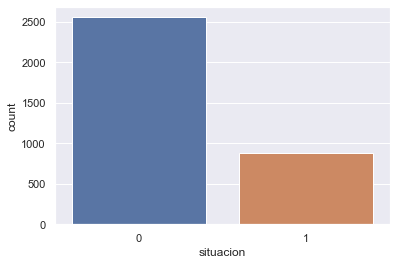

In [ ]:
sns.countplot(data.situacion)
print(f"El {round(data.situacion.value_counts()[1]/data.situacion.value_counts()[0]*100,2)} de los target totales son Abandono")

In [ ]:
# Valores de variable objetivo "situacion"
data.situacion.value_counts()

0    2557
1     882
Name: situacion, dtype: int64

El dataset esta desbalanceado

# 4. Analisis de features

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sexo,3439.0,0.315499,0.464782,0.0,0.0,0.0,1.0,1.0
edad_inicio,3439.0,20.587380,2.253657,18.0,20.0,20.0,21.0,54.0
situacion,3439.0,0.256470,0.436748,0.0,0.0,0.0,1.0,1.0
n_Anatomía,3439.0,1.059901,0.664407,0.0,1.0,1.0,1.0,5.0
nota_Anatomía,3439.0,5.334400,2.729274,0.0,4.0,6.0,7.0,10.0
...,...,...,...,...,...,...,...,...
nota_MicroyParII,3439.0,4.701367,3.384782,0.0,0.0,6.0,8.0,10.0
n_InmunoH,3439.0,0.770864,0.526616,0.0,0.0,1.0,1.0,4.0
nota_InmunoH,3439.0,5.092760,3.437102,0.0,0.0,6.0,8.0,10.0
n_Urología,3439.0,0.697005,0.474565,0.0,0.0,1.0,1.0,3.0


### 4.1 Correlacion

In [ ]:
# Creo funcion para heatmap de corr

def corr_situacion(target, data):
    corr = data.corrwith(target).sort_values(ascending = False).to_frame()
    corr.columns = ['Correlación de Pearson']
    cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
    plt.subplots(figsize = (10,10))
    sns.heatmap(corr,annot = True,cmap = cmap,linewidths = 0.4,linecolor = 'black', fmt= '.1f')
    plt.title('Correlación de Pearson de Abandono')

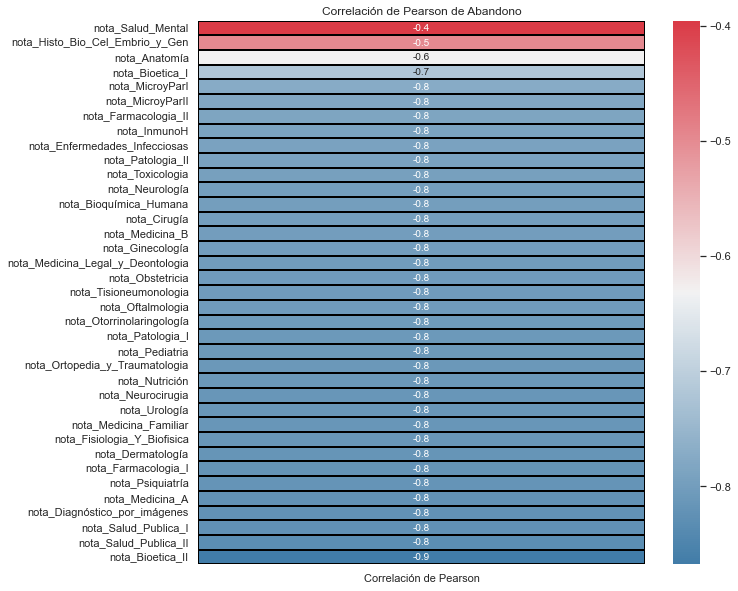

In [ ]:
corr_situacion(data.situacion, nota_data)

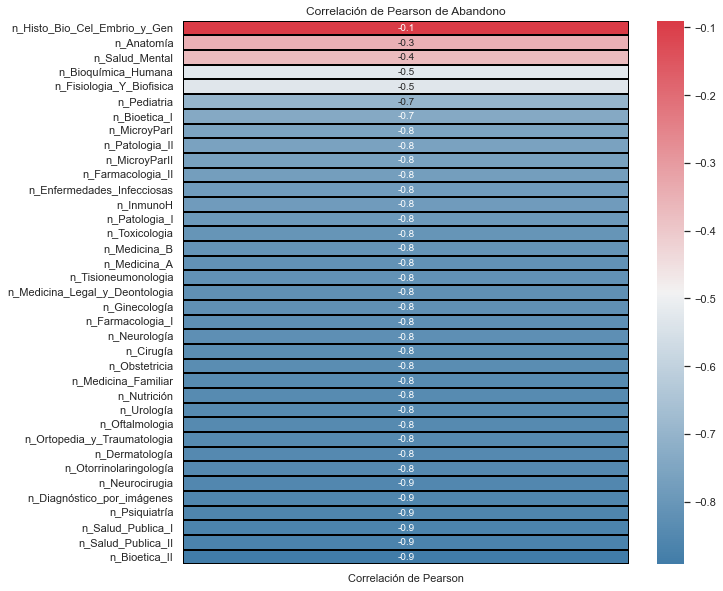

In [ ]:
corr_situacion(data.situacion,n_data)

# 5. Machine Learning

### 5.1 Funciones

In [ ]:
# Funcion para Scores

validacion_df = pd.DataFrame()
testing_df = pd.DataFrame()

def evaluacion(y_test, y_pred, model="", df=""):
    # Crear diccionario para almacenar los resultados
    resultados = {}

    # Calcular sensibilidad
    sensibilidad = metrics.recall_score(y_test, y_pred)
    resultados['Sensitivity'] = round(sensibilidad,2)

    # Calcular accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    resultados['Accuracy'] = round(accuracy,2)

    # Calcular precision
    precision = metrics.precision_score(y_test, y_pred)
    resultados['Precision'] = round(precision,2)

    # Calcular F1 score
    f1_score = metrics.f1_score(y_test, y_pred)
    resultados['F1_Score'] = round(f1_score,2)

    # Calcular AUC y graficar ROC
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    resultados['AUC'] = round(auc,2)
    plt.plot(fpr, tpr, label='ROC (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Graficar matrix de confusion con heatmap
    cm = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=np.unique(y_test).tolist(), yticklabels=np.unique(y_pred).tolist())
    plt.title(f'Matrix de Confusion {model}')
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Predicho')
    plt.show()

    # Dataframe con los resultados de las metricas
    resultado_df = pd.DataFrame.from_dict(resultados, orient='index', columns=[model])

    # Agrega resultados al df de modelos indicado
    if df == "validacion":
        validacion_df[model]= resultado_df
        return validacion_df.transpose().reset_index().rename(columns={"index": "Modelos"}).sort_values(by=["AUC"], ascending=False)

    elif df == "testing":
        testing_df[model]= resultado_df
        return testing_df.transpose().reset_index().rename(columns={"index": "Modelos"}).sort_values(by=["AUC"], ascending=False)

### 5.2 Separaciones variables de Target

In [ ]:
X = data.drop(columns=["situacion"])
y = data.situacion

### 5.3 Split Train and Test

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1, shuffle=True, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=1)

print("X {} de:\n- (75%) Entrenamiento: {}\n- (12.53%) Testing: {}\n- (12.47%) Validacion: {}\n\nY {} de:\n- (75%) Entrenamiento {}\n- (12.53%) Testing: {}\n- (12.47%) Validacion: {}"
    .format(X.shape, X_train.shape, X_test.shape, X_val.shape, y.shape, y_train.shape, y_test.shape, y_val.shape))

X (3439, 76) de:
- (75%) Entrenamiento: (2579, 76)
- (12.53%) Testing: (430, 76)
- (12.47%) Validacion: (430, 76)

Y (3439,) de:
- (75%) Entrenamiento (2579,)
- (12.53%) Testing: (430,)
- (12.47%) Validacion: (430,)


### 5.4 Escalar variables

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_val_scaler= scaler.transform(X_val)
X_test_scaler= scaler.transform(X_test)

# 6. Modelos

#### Mediante el Framework Optuna realizo busqueda de hiperparametros para los modelos Logistic Regression, XGBoost, RandomForest y CatBoost con sus regulaciones.

In [ ]:
# Defino funcion para calcular parametros

def tune(objective):
    sampler = TPESampler(seed=1)
    study = optuna.create_study(direction="maximize", sampler=sampler)
    study.optimize(objective, n_trials=100)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params


## 6.1 Logistic Regression

In [ ]:
# Creo la funcion objetive donde voy a colocar los parametros a analizar
def objective_logistic(trial):

    param = {
        "penalty": trial.suggest_categorical("penalty", ["l1", "l2"]),
        "tol": trial.suggest_float("tol", 0.0001, 0.01, log=True),
        "C":trial.suggest_float("C", 1.0, 10.0, log=True),
        "fit_intercept" :trial.suggest_categorical("fit_intercept", [True, False]),
        "solver" :trial.suggest_categorical("solver", ["liblinear", "saga"]),
        "multi_class": "auto"

    }

    # Fit the model
    optuna_model = LogisticRegression(random_state=1,**param)

    #Fit modelo
    optuna_model.fit(X_train_scaler, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_val_scaler)

    # Evaluate predictions
    return metrics.roc_auc_score(y_val, y_pred)


#Calculo hiperparametros
logistic_params =  tune(objective_logistic)

Best score: 0.9740285265049415

Optimized parameters: {'penalty': 'l1', 'tol': 0.0012052792140601278, 'C': 2.0476997842438207, 'fit_intercept': False, 'solver': 'liblinear'}



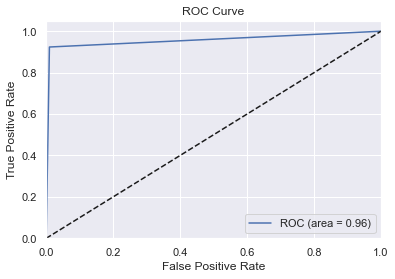

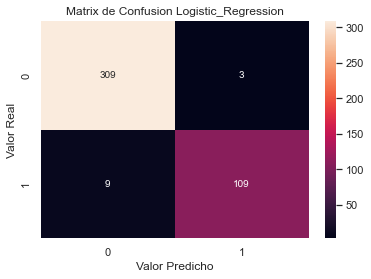

,Modelos,Sensitivity,Accuracy,Precision,F1_Score,AUC
0,Logistic_Regression,0.92,0.97,0.97,0.95,0.96


In [ ]:
# Realizo modelo con los hiperparametros seleccionados
logr = LogisticRegression(**logistic_params)
logr_opt = logr.fit(X_train_scaler, y_train)

# Prediccion
y_pred_logr_opt = logr_opt.predict(X_val_scaler)

# Evaluacion
evaluacion(y_pred_logr_opt, y_val, "Logistic_Regression", df="validacion")

## 6.2 Random Forest Classifier

In [ ]:
def objective_rfc(trial):

    param = {
        "n_estimators": trial.suggest_int('n_estimators', 1, 200),
        "max_depth" : trial.suggest_int('max_depth', 1, 20),
        "min_samples_split" : trial.suggest_uniform('min_samples_split', 0.01, 0.5),
        "min_samples_leaf" : trial.suggest_uniform('min_samples_leaf', 0.01, 0.5),
        "criterion" : trial.suggest_categorical('criterion', ['gini', 'entropy']),
        "max_features" : trial.suggest_categorical('max_features', ['auto', 'log2']),
        "bootstrap" : trial.suggest_categorical("bootstrap", [True, False])

    }

    # Fit the model
    optuna_model = RandomForestClassifier(random_state=1,**param)

    #Fit modelo
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_val)

    # Evaluate predictions
    return metrics.roc_auc_score(y_val, y_pred)


#Calculo hiperparametros
rfc_params =  tune(objective_rfc)

Best score: 0.9679919137466308

Optimized parameters: {'n_estimators': 2, 'max_depth': 10, 'min_samples_split': 0.38316790969817516, 'min_samples_leaf': 0.24411092101178639, 'criterion': 'entropy', 'max_features': 'log2', 'bootstrap': False}



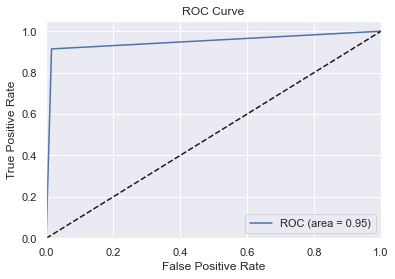

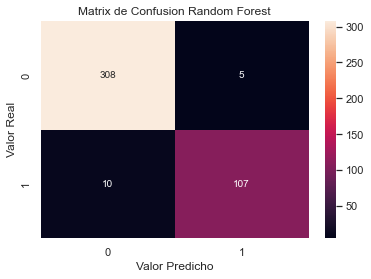

,Modelos,Sensitivity,Accuracy,Precision,F1_Score,AUC
0,Logistic_Regression,0.92,0.97,0.97,0.95,0.96
1,Random Forest,0.91,0.97,0.96,0.93,0.95


In [ ]:
# Realizo modelo con los hiperparametros seleccionados
rfc = RandomForestClassifier(**rfc_params)
rfc_opt = rfc.fit(X_train, y_train)

# Prediccion
y_pred_rfc_opt = rfc_opt.predict(X_val)

# Evaluacion
evaluacion(y_pred_rfc_opt, y_val, "Random Forest", df="validacion")

## 6.3 XGBoost

In [ ]:
def objective_xgb(trial):

    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    # Fit the model
    optuna_model = XGBClassifier(random_state=1,**param)
    #Fit modelo
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_val)

    # Evaluate predictions
    return metrics.roc_auc_score(y_val, y_pred)

#Calculo hiperparametros
xgb_params =  tune(objective_xgb)

Best score: 0.9666722821203952

Optimized parameters: {'booster': 'gblinear', 'lambda': 2.622168410226067e-06, 'alpha': 1.492956405760975e-07, 'subsample': 0.2738708758150383, 'colsample_bytree': 0.3490081691021367}



[14:47:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "subsample" } are not used.



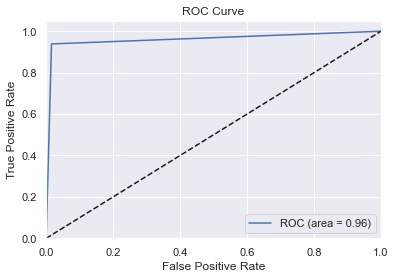

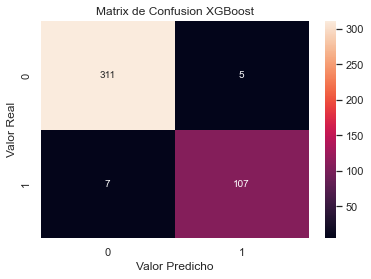

,Modelos,Sensitivity,Accuracy,Precision,F1_Score,AUC
0,Logistic_Regression,0.92,0.97,0.97,0.95,0.96
2,XGBoost,0.94,0.97,0.96,0.95,0.96
1,Random Forest,0.91,0.97,0.96,0.93,0.95


In [ ]:
# Realizo modelo con los hiperparametros seleccionados
xgb = XGBClassifier(**xgb_params)
xgb_opt = xgb.fit(X_train, y_train)

# Prediccion
y_pred_xgb_opt = xgb_opt.predict(X_val)

# Evaluacion
evaluacion(y_pred_xgb_opt, y_val, "XGBoost", df="validacion")

## 6.4 Catboost

### Creación modelo de clasificación.

hiperparametros:
- `loss_function`: Metrica a utilizar en entrenamiento, especifica el problema de Machine Learning a resolver. _**Default**: Logloss_
- `custom_metric`: Metrica mostrada durante el entrenamiento, no estan optimizadas y son solamente para mostrar informacion.
- `eval_metric`: Metrica utilizada para detectar overfitting y seleccion de mejor modelo.


Cambiar `logging_level="Verbose"` para ver el output de entrenamiento en forma de texto.

In [ ]:
cat_default = CatBoostClassifier(
    custom_metric=["Logloss", "Recall", "Accuracy", "Precision", "F1", "AUC"],
    random_seed=1,
    logging_level='Silent',
    eval_metric = "AUC"
)

# Funciones para Catboost

Funciones que reemplazan las funciones graficas de Catboost con Ipywidgets, por una impresion en pantalla de texto, dataframe y graficos con Seaborn.\
Creo funcion para hacer CV de los datos.

## Informacion sobre score de Catboost

Funcion que devuelve la **curva ROC**, **Heatmap** y **Metricas** evaluadas para el modelo Catboost dado.

In [ ]:
def catboost_score_info(modelo_catboost, X_val, y_val, train_pool, nombre, df=""):
    '''
    Devuelve curva roc, matriz de confusion y dataframe con scores para cada modelo.
    '''

    # Guarda scores en validacion de catboost
    scores = modelo_catboost.best_score_

    # Crea curva ROC Catboost
    (fpr, tpr, thresholds) = get_roc_curve(modelo_catboost, train_pool)
    plt.plot(fpr, tpr, label='ROC (area = %0.2f)' % scores["validation"]["AUC"])
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Crea matriz de confusion Catboost
    cm = get_confusion_matrix(modelo_catboost, train_pool)
    y_pred_catboost = modelo_catboost.predict(X_val)
    sns.heatmap(np.asarray(cm, dtype = 'int'), annot=True, fmt="d", xticklabels=np.unique(y_pred_catboost).tolist(), yticklabels=np.unique(y_val).tolist())
    plt.title('Matrix de Confusion Catboost')
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Predicho')
    plt.show()

    # Imprime los valores de los scores Catboost
    for fase, score in scores.items():
        print("\nEn la fase de {}, los scores son:".format("ENTRENAMIENTO" if fase == "learn" else "VALIDACION"))
        for key in score:
            print(" - " + key + ':', round(score[key], 3))

    # Dataframe con los resultados de las metricas
    resultado_df = pd.DataFrame.from_dict(scores["validation"], orient='index', columns=[nombre]).rename(index={"Recall":"Sensitivity", "F1":"F1_Score"})

    # Agrega resultados al df de modelos indicado
    if df == "validacion":
        validacion_df[nombre]= resultado_df
        return validacion_df.transpose().reset_index().rename(columns={"index": "Modelos"}).sort_values(by=["AUC"], ascending=False).round(2)

    elif df == "testing":
        testing_df[nombre]= resultado_df
        return testing_df.transpose().reset_index().rename(columns={"index": "Modelos"}).sort_values(by=["AUC"], ascending=False).round(2)

## Informacion sobre el modelo

Funcion que devuelve un grafico de barras con la feature importance de cada feature, junto a:

- El numero de arboles totales.
- La mejor iteracion: Es la iteracion con mejor puntaje sin entrar en overfitting.
  - Usarlo para el atributo `early_stopping_round`.
- Mejor puntaje: Según el Logloss y Accuracy.

In [ ]:
def info_modelo(model, n_features):

    """
    Funcion que devuelve en un histograma la importanica de las primeras n_features indicadas.
    Informa sobre el numero de árboles creados, numero de iteraciones y los mejores scores obtenidos.
    """

    # Crea un diccionario con el nombre de las features y su importancia
    features = dict(zip(model.feature_names_, model.feature_importances_))

    # Ordena el diccionario de mayor a menor segun el valor
    features_sorted = dict(sorted(features.items(), key=lambda x: x[1], reverse=True))

    # Transforma las llaves y valores del diccionario en listas
    features_names, features_values = list(features_sorted.keys()), list(features_sorted.values())

    # Tamaño de la figura
    sns.set(rc={'figure.figsize':(8,8)})

    # Estilo grillado negro
    sns.set_style("darkgrid")

    # Barplot con las n features mas importantes
    ax = sns.barplot(x=features_values[:n_features], y=features_names[:n_features], orient="h", palette="viridis")

    # Titulo del grafico
    ax.set(title="Importancia de las features")

    # Etiquetas para cada barra
    for i in ax.containers:
        ax.bar_label(i, fmt="%.2f")

    # Muestra el grafico
    plt.show()

    # Informacion sobre el modelo:
    print("- Numero de arboles: {}\n- Mejor iteracion: {}".format(model.tree_count_, model.best_iteration_))

# Catboost Entrenamiento con valores por default

Crea la curva de aprendizaje donde se puede ver como varia el Logloss y la Precision del modelo durante el entrenamiento y la evaluacion.

- [¿Que es la curva de aprendizaje?](https://towardsdatascience.com/5-cute-features-of-catboost-61532c260f69)
- [¿Qué son los objetos "Pool"?](https://catboost.ai/en/docs/concepts/python-reference_pool)
- [¿Qué es Logloss? (Blog)](https://towardsdatascience.com/intuition-behind-log-loss-score-4e0c9979680a)
- [TL:DR Logloss (Kaggle)](https://www.kaggle.com/code/dansbecker/what-is-log-loss/notebook)

Hiperparametros:

- `use_best_model = True` → No guarda los arboles creados despues de la iteracion con el valor de la metrica mas optima.
- `early_stopping_rounds=n` = N cantidad de iteraciones realizadas luego de encontrar la iteracion de metrica mas optima.

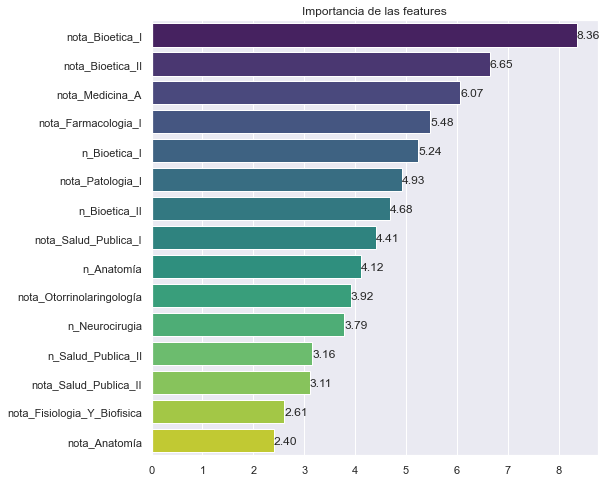

- Numero de arboles: 20
- Mejor iteracion: 19


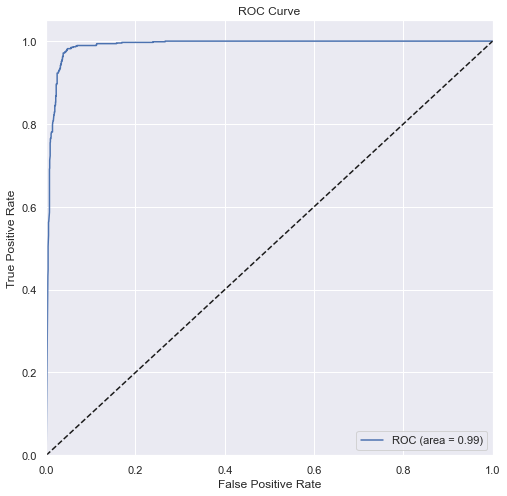

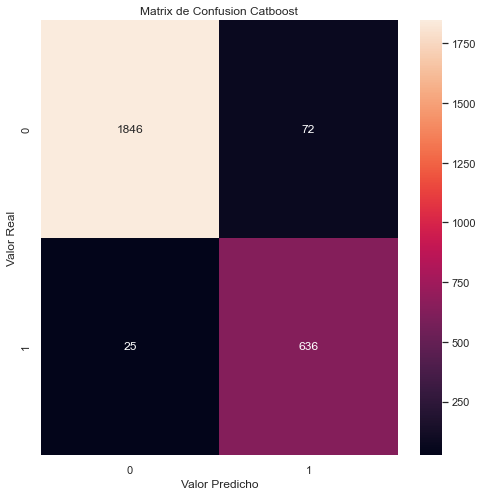


En la fase de ENTRENAMIENTO, los scores son:
 - Accuracy: 0.976
 - Recall: 0.982
 - F1: 0.954
 - Logloss: 0.083
 - Precision: 0.927

En la fase de VALIDACION, los scores son:
 - Accuracy: 0.963
 - Recall: 0.972
 - F1: 0.93
 - Logloss: 0.124
 - Precision: 0.891
 - AUC: 0.987


,Modelos,Sensitivity,Accuracy,Precision,F1_Score,AUC
3,Catboost Default,0.97,0.96,0.89,0.93,0.99
0,Logistic_Regression,0.92,0.97,0.97,0.95,0.96
2,XGBoost,0.94,0.97,0.96,0.95,0.96
1,Random Forest,0.91,0.97,0.96,0.93,0.95


In [ ]:
# Creamos los objetos pool para training y testing
train_pool = Pool(X_train, y_train, cat_features=["sexo"])
eval_pool = Pool (X_test, y_test, cat_features=["sexo"])

# Entrenamiento del modelo
cat_default.fit(train_pool,
    eval_set=eval_pool,
    use_best_model = True,
    early_stopping_rounds= 100,
    plot=False
    )

info_modelo(cat_default, 15)
catboost_score_info(cat_default, X_val, y_val, train_pool, "Catboost Default", df="validacion")

# Tuning de hiperparametros

[Hiperparametros Catboost](https://catboost.ai/en/docs/concepts/parameter-tuning)

### Hiperparametros modelo:
- `loss_function`: Metrica a utilizar en entrenamiento, especifica el problema de Machine Learning a resolver.
- `custom_metric`: Metrica mostrada durante el entrenamiento, no estan optimizadas y son solamente para mostrar informacion.
- `eval_metric`: Metrica utilizada para detectar overfitting y seleccion de mejor modelo.
- `random_seed`: Semilla a utilizar.
- `learning_rate`: Tasa de aprendizaje en entrenamiento.
- `iterations`: Maximo numero de arboles creadores para resolver el problema de Machine Learning.
- `12_leaf_reg`: Coeficiente en la regularizacion L2 de la funcion de costo.
- `depth`: Profundidad del arbol.
- `bootstrap_type`: Define el metodo de muestreo de pesos de los objetos.
- `random_strength`: Monto de aleatoriedad usado en el puntaje de splits en la estructura del arbol usado.
- `od_type`: Tipo de detector de overfitting a usar
- `od_wait`: Numero de iteraciones a continuar el entrenamiento luego de la iteracion con metrica optima.

#### Hiperparametros fit:
- `use_best_model = True` → No guarda los arboles creados despues de la iteracion con el valor de la metrica mas optima.
- `early_stopping_rounds=n` = N cantidad de iteraciones realizadas luego de encontrar la iteracion de metrica mas optima.

## Tuning con Optuna

[Tutorial en Catboost](https://practicaldatascience.co.uk/machine-learning/how-to-tune-a-catboostclassifier-model-with-optuna)

In [ ]:
def objective(trial):
    model = CatBoostClassifier(
        custom_loss=["Logloss", "Recall", "Accuracy", "Precision", "F1", "AUC"],
        random_seed=1,
        logging_level='Silent',
        loss_function = "Logloss",
        eval_metric = trial.suggest_categorical('eval_metric', ['AUC', 'Logloss', 'F1']),
        iterations=trial.suggest_int("iterations", 100, 1000),
        learning_rate=trial.suggest_float("learning_rate", 0.1, 0.5, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        l2_leaf_reg=trial.suggest_int("l2_leaf_reg", 1, 10, log=True),
        bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli"]),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50)
    )

    model.fit(
        train_pool,
        eval_set=eval_pool,
        use_best_model = True,
        early_stopping_rounds= 100,
        plot=False
    )

    y_pred = model.predict(X_test)
    return metrics.roc_auc_score(y_test, y_pred)

optuna.logging.set_verbosity(optuna.logging.WARNING)

sampler = TPESampler(seed=1)
study = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=100)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value:  0.9691045757237988
  Params: 
    eval_metric: F1
    iterations: 891
    learning_rate: 0.11714978256664511
    depth: 6
    l2_leaf_reg: 9
    bootstrap_type: Bernoulli
    random_strength: 6.912588094940543e-06
    od_type: Iter
    od_wait: 10


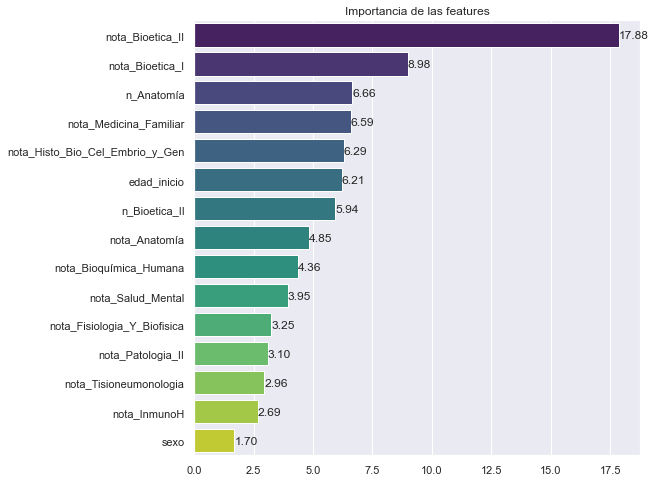

- Numero de arboles: 21
- Mejor iteracion: 20


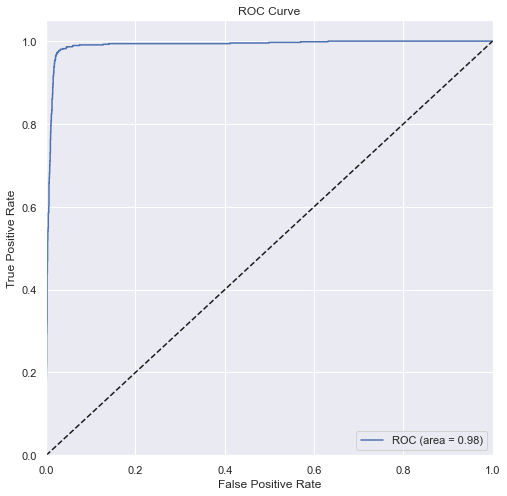

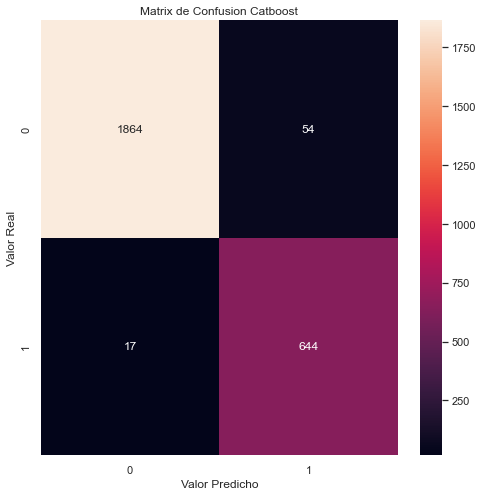


En la fase de ENTRENAMIENTO, los scores son:
 - Accuracy: 0.986
 - Recall: 0.989
 - Logloss: 0.057
 - F1: 0.973
 - Precision: 0.958

En la fase de VALIDACION, los scores son:
 - Accuracy: 0.967
 - Recall: 0.972
 - Logloss: 0.125
 - F1: 0.938
 - AUC: 0.983
 - Precision: 0.906


,Modelos,Sensitivity,Accuracy,Precision,F1_Score,AUC
3,Catboost Default,0.97,0.96,0.89,0.93,0.99
4,Catboost Optuna,0.97,0.97,0.91,0.94,0.98
0,Logistic_Regression,0.92,0.97,0.97,0.95,0.96
2,XGBoost,0.94,0.97,0.96,0.95,0.96
1,Random Forest,0.91,0.97,0.96,0.93,0.95


In [ ]:
cat_optuna = CatBoostClassifier(
    **trial.params,
    custom_loss=["Logloss", "Recall", "Accuracy", "Precision", "F1", "AUC"],
    random_seed=1,
    logging_level='Silent',
    loss_function = "Logloss"
    )

cat_optuna.fit(
    train_pool,
    eval_set=eval_pool,
    use_best_model = True,
    early_stopping_rounds= 100,
    plot=False
)

info_modelo(cat_optuna, 15)
catboost_score_info(cat_optuna, X_val, y_val, train_pool, "Catboost Optuna", df="validacion")

# 7. Nota:

Los modelos fueron ordenados segun su desempeño bajo la metrica [AUC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=es-419) *(area bajo la curva)*.

Seleccionada debido a que:

1. Es compartido por todos los modelos (Catboost Classifier no entrena en otras metricas).
2. "*Mide qué tan bien se clasifican las predicciones, en lugar de sus valores absolutos.*" Util en este caso porque necesitamos estar seguros de que un alumno este bien clasificado como "`Abandono`".

# 8. Tests

Se evaluaran los primeros 3 modelos mejor rankeados, siendo:

* **Catboost** con sus parametros por Default
* **XGBoost**
* **Logistic Regression**

## 8.1 Test Catboost

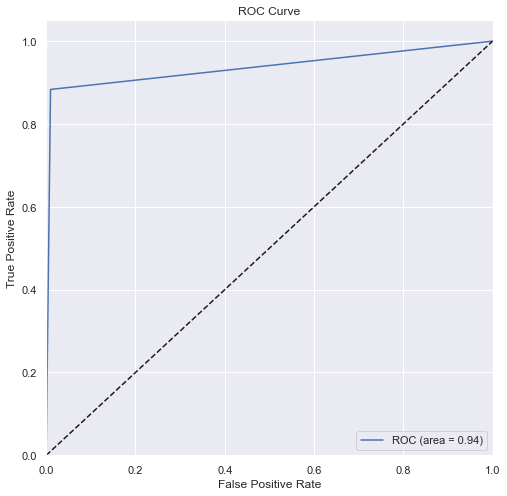

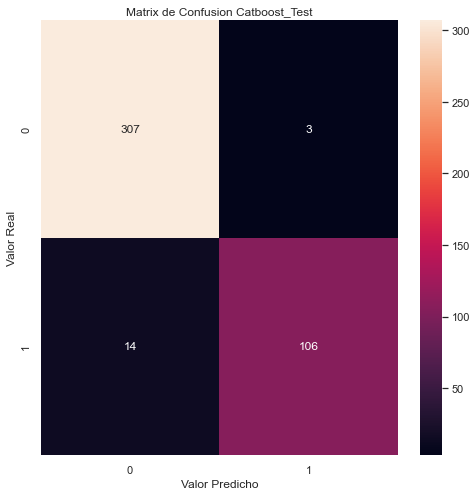

,Modelos,Sensitivity,Accuracy,Precision,F1_Score,AUC
0,Catboost_Test,0.88,0.96,0.97,0.93,0.94


In [ ]:
catboost_df_predictions = cat_default.predict(X_test)

evaluacion(catboost_df_predictions, y_test, "Catboost_Test", df="testing")

## 8.2 Test XGBoost

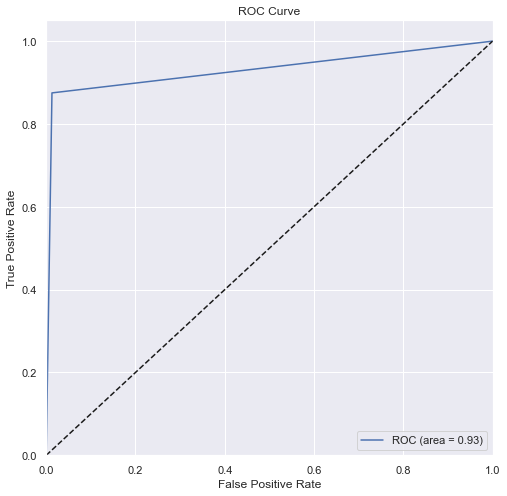

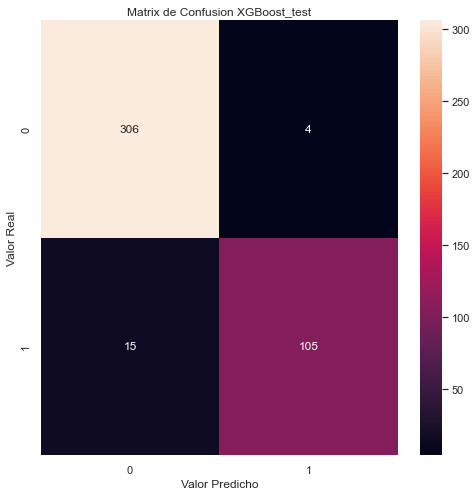

,Modelos,Sensitivity,Accuracy,Precision,F1_Score,AUC
0,Catboost_Test,0.88,0.96,0.97,0.93,0.94
1,XGBoost_test,0.88,0.96,0.96,0.92,0.93


In [ ]:
# Prediccion
y_pred_xgb_opt_test = xgb_opt.predict(X_test)

evaluacion(y_pred_xgb_opt_test, y_test, "XGBoost_test", df="testing")

## 8.3 Test Logistic Regression

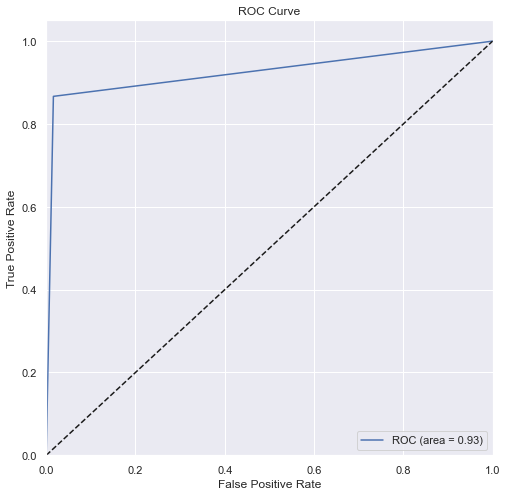

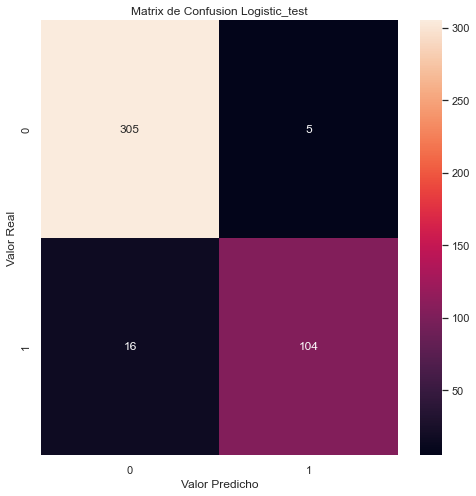

,Modelos,Sensitivity,Accuracy,Precision,F1_Score,AUC
0,Catboost_Test,0.88,0.96,0.97,0.93,0.94
1,XGBoost_test,0.88,0.96,0.96,0.92,0.93
2,Logistic_test,0.87,0.95,0.95,0.91,0.93


In [ ]:
# Prediccion
y_pred_logr_opt_test = logr_opt.predict(X_test_scaler)

evaluacion(y_pred_logr_opt_test, y_test, "Logistic_test", df="testing")

# 9 Features importance

## 9.1 Catboost

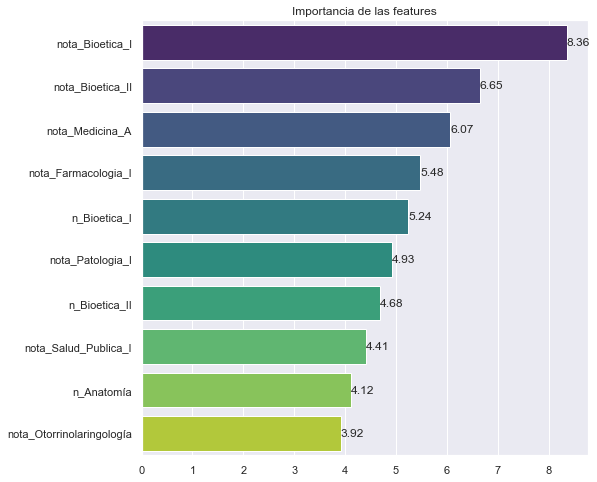

- Numero de arboles: 20
- Mejor iteracion: 19


In [ ]:
info_modelo(cat_default, 10)

## 9.2 XGBoost

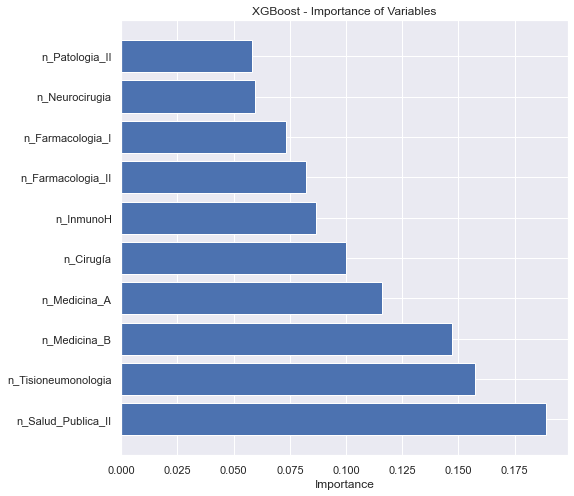

In [ ]:
from xgboost import plot_importance

importance = xgb_opt.feature_importances_

# Crea un dataframe con las variables y sus importancias
importance = pd.DataFrame({'Variable': X_train.columns, 'Importance': importance})
importance = importance.sort_values('Importance', ascending=False)

# Selecciona las 10 variables más importantes
top_10 = importance[:10]

# Realiza un plot de importancia de variables
plt.barh(top_10['Variable'], top_10['Importance'])
plt.xlabel('Importance')
plt.title('XGBoost - Importance of Variables')
plt.show()

## 9.3 Logistic Regression

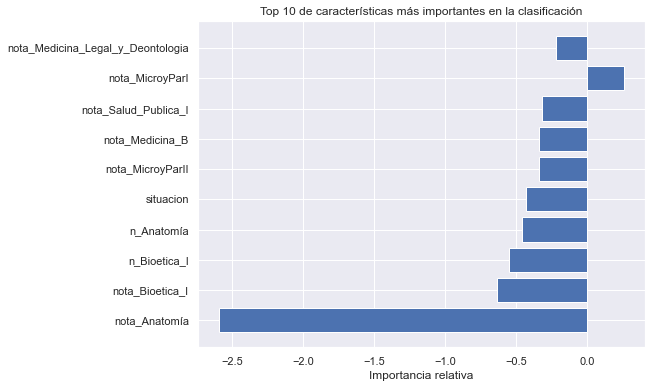

In [ ]:
# Obtener coeficientes
coef = logr_opt.coef_[0]

# Obtener el top 10 de características más importantes
top10_idx = np.abs(coef).argsort()[::-1][:10]
top10_features = data.columns[top10_idx]

# Graficar top 10 de características más importantes
plt.figure(figsize=(8, 6))
plt.barh(top10_features, coef[top10_idx])
plt.xlabel("Importancia relativa")
plt.title("Top 10 de características más importantes en la clasificación")
plt.show()


# 10. Conclusion:

Segun los Scores obtenidos, el modelo de mejor rendimiento es Catboost.\
Se procede a guardar este modelo.

# 11. Guardado modelo

In [ ]:
# Gurdado de modelo
cat_default.save_model('modelo_catboost_unidas')

# Cargado de modelo
cat_default = CatBoostClassifier()
cat_default.load_model('modelo_catboost_unidas')

In [ ]:
# Guarda modelo
# import pickle

# with open('UBATIC_model_logistic.pkl', 'wb') as model:
#     pickle.dump(logr_opt, model)

In [ ]:
# Carga modelo
# with open('UBATIC_model_logistic.pkl', 'rb') as f:
#     model = pickle.load(f)

In [ ]:
# Funcion para generar predicciones

def predecir(**kwargs):
    df_model = pd.DataFrame(kwargs, index=[0])

    label_pred = cat_default.predict(df_model)[0].item()

    if label_pred == 1:
        return "Abandona"
    else:
        return "No Abandona"

# Prueba de la funcion
diccionario = dict(zip(data.columns.drop("situacion"), [1, 20.,  3.,  7.,] + [0 for _ in range(72)]))

predecir(**diccionario)

'Abandona'

# 12. Interfaz Gradio

Libreria de Python para crear una interfaz grafica para el modelo.

In [ ]:
import gradio as gr

# Definir las asignaturas y valores por defecto
asignaturas = {
    "Anatomía": 0,
    "BioeticaI": 0,
    "BioeticaII": 0,
    "Bioquimica Humana": 0,
    "Cirugía": 0,
    "Dermatología": 0,
    "Diagnostico por Imagenes": 0,
    "Infectologia": 0,
    "Farmacologia I": 0,
    "Farmacologia II": 0,
    "Fisiologia" : 0,
    "Ginecologia": 0,
    "Histologia": 0,
    "Medicina A": 0,
    "Medicina B": 7,
    "Medicina Familiar": 7,
    "Medicina Legal": 7,
    "Neurocirugia": 7,
    "Neurologia": 7,
    "Nutricion": 7,
    "Obstetricia": 7,
    "Oftalmologia":7,
    "Traumatologia": 7,
    "Otorrinolaringologia": 7,
    "Patologia I": 7,
    "Patologia II": 7,
    "Pediatria": 7,
    "Psiquiatria": 7,
    "Salud mental": 7,
    "Salud Publica I": 7,
    "Salud Publica II": 7,
    "Neumonologia": 7,
    "Toxicologia": 7,
    "Micrologia I": 7,
    "Micrologia II": 7,
    "Inmunologia": 7,
    "Urología": 7
}

# Crear los sliders con un bucle
sliders = []
for asignatura, valor in asignaturas.items():
    sliders.append(gr.inputs.Slider(
        label=f"Intentos de finales {asignatura}",
        minimum=0,
        maximum=3,
        step=1,
        default=valor
    ))

# Notas
sliders_nota = []
for asignatura, valor in asignaturas.items():
    sliders_nota.append(gr.inputs.Slider(
        label=f"Nota {asignatura}",
        minimum=0,
        maximum=10,
        step=1,
        default=valor
    ))

# Definir salida
output_label = gr.outputs.Label(num_top_classes=1, label="Resultado de la partida")

# Crear los inputs finales
# Sexo
sexo = gr.inputs.Dropdown(label="Sexo", choices=[0, 1])

# Edad inicio
edad_inicio = gr.inputs.Number(label="edad_inicio")

# Columnas de intentos de finales
columnas_intentos = data.columns[data.columns.str.startswith("n_")]

# Diccionario con intentos asignados
diccionario_intentos = dict(zip(columnas_intentos, sliders))

# Columnas de notas de finales
columnas_notas = data.columns[data.columns.str.startswith("nota_")]

# Diccionario con notas de finales asignados
diccionario_notas = dict(zip(columnas_notas, sliders_nota))

In [ ]:
# Definir la interfaz
iface = gr.Interface(fn=predecir,
                     inputs=[sexo, edad_inicio, *diccionario_intentos.values(), *diccionario_notas.values()],
                     outputs=output_label,
                     title="Predicción de Abandono de Facultad de Medicina - UBA",
                     theme=gr.themes.Soft(),
                     layout="horizontal",
                     allow_flagging=False,
                     description="Coloca tus notas e intentos de finales")

# Ejecutar la interfaz
iface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
